#PCA

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
import matplotlib.patches as mpatches

In [4]:
#get the data
!git clone https://git.wur.nl/dijk097/ml2022_projectmbf.git data
#read csvfile
data = pd.read_csv('data/data_labeled_fixed.csv')
#remove - in name
data.columns = data.columns.str.replace("-", "")

Cloning into 'data'...
remote: Enumerating objects: 38, done.
remote: Total 38 (delta 0), reused 0 (delta 0), pack-reused 38
Unpacking objects: 100% (38/38), done.
Checking out files: 100% (12/12), done.


In [5]:
week3_data=data.iloc[:,:-2]
week3_data
cell_class=data["CLASS"].map({'Cone Bipolar ON' :0, 'Cone Bipolar OFF' :1, 'Rod Bipolar' :2, 'Amacrine' :3}).astype(int)
cell_type=data["CELLTYPE"].map({'BC6':1, 'BC3B':2, 'BC3A':3, 'BC7':4, 'Rod BC':5, 'BC2':6, 'BC4':7, 'Amacrine_2':8,
       'Amacrine_1':9})
cell_class_color=data["CLASS"].map({'Cone Bipolar ON' :'r', 'Cone Bipolar OFF' :"y", 'Rod Bipolar' :'b', 'Amacrine' :'g'})
cell_type_color=data["CELLTYPE"].map({'BC6':'b', 'BC3B':'g', 'BC3A':'r', 'BC7':'c', 'Rod BC':'m', 'BC2':'y', 'BC4':"yellow", 'Amacrine_2':"purple",
       'Amacrine_1':"pink"})

In [6]:
data["CELLTYPE"].unique()

array(['BC6', 'BC3B', 'BC3A', 'BC7', 'Rod BC', 'BC2', 'BC4', 'Amacrine_2',
       'Amacrine_1'], dtype=object)

##PCA with all data without scaling

In [7]:
V=[]
PC=[]
for i in range(len(week3_data.columns)):
  PC.append("PC"+str(i+1))
  V.append("V"+str(i+1))

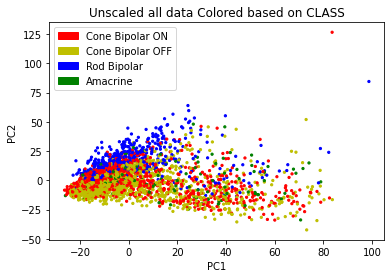

In [8]:
pca_fit = PCA(random_state=42).fit(week3_data)
pca_loadings = pd.DataFrame(pca_fit.components_.T, index=week3_data.columns, columns=V)
pca_df=pd.DataFrame(pca_fit.fit_transform(week3_data), columns= PC,index=week3_data.index)
fig, ax = plt.subplots()
plt.scatter(pca_df.PC1, pca_df.PC2, c=cell_class_color,s=5)
Cone_Bipolar_ON= mpatches.Patch(color='r', label='Cone Bipolar ON')
Cone_Bipolar_OFF= mpatches.Patch(color='y', label='Cone Bipolar OFF')
Rod_Bipolar= mpatches.Patch(color='b', label='Rod Bipolar')
Amacrine= mpatches.Patch(color='g', label='Amacrine')
ax.legend(handles=[Cone_Bipolar_ON,Cone_Bipolar_OFF,Rod_Bipolar,Amacrine])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Unscaled all data Colored based on CLASS")
plt.show()

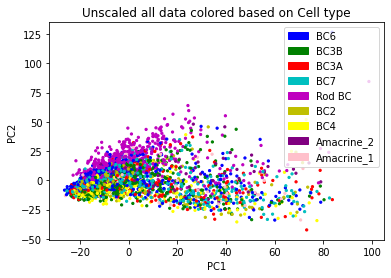

In [9]:
pca_fit = PCA(random_state=42).fit(week3_data)
pca_loadings = pd.DataFrame(pca_fit.components_.T, index=week3_data.columns, columns=V)
pca_df=pd.DataFrame(pca_fit.fit_transform(week3_data), columns= PC,index=week3_data.index)
fig, ax = plt.subplots()
plt.scatter(pca_df.PC1, pca_df.PC2, c=cell_type_color,s=5)
plt.title("Unscaled all data colored based on Cell type")
BC6= mpatches.Patch(color='b', label='BC6')
BC3B = mpatches.Patch(color='g', label='BC3B')
BC3A = mpatches.Patch(color='r', label='BC3A')
BC7 = mpatches.Patch(color='c', label='BC7')
Rod_BC= mpatches.Patch(color='m', label='Rod BC')
BC2 = mpatches.Patch(color='y', label='BC2')
BC4 = mpatches.Patch(color='yellow', label='BC4')
Amacrine_2 = mpatches.Patch(color='purple', label= 'Amacrine_2')
Amacrine_1 = mpatches.Patch(color='pink', label= 'Amacrine_1')
ax.legend(handles=[BC6, BC3B, BC3A, BC7, Rod_BC, BC2, BC4, Amacrine_2,Amacrine_1])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

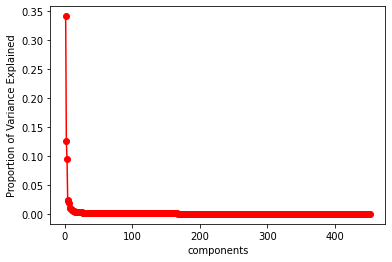

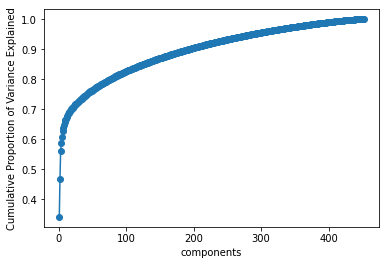

In [10]:

plt.plot(list(range(1,len(pca_df.columns)+1)),pca_fit.explained_variance_ratio_,'-ro')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel("components")
plt.show()
plt.plot(list(range(1,len(pca_df.columns)+1)),np.cumsum(pca_fit.explained_variance_ratio_),'-o')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xlabel("components")
plt.show()

[Text(0.5, 1.0, 'loading value of PCA with all unscaled data for top 22 genes')]

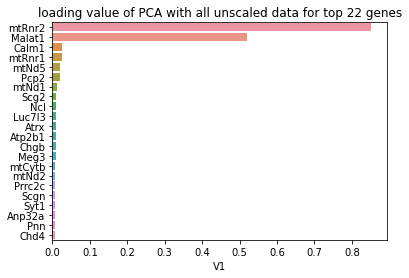

In [11]:
import seaborn as sns 
V1_PCA = pd.DataFrame(data=pca_loadings.abs(), index=pca_loadings.index, columns = ["V1","V2","V3"])\
       .sort_values(by=["V1"], ascending= False)

# And visualize
sns.barplot(data=V1_PCA.iloc[:22], x="V1", y=V1_PCA.index[:22]).set(title='loading value of PCA with all unscaled data for top 22 genes')

[Text(0.5, 1.0, 'Sum of first 3 loading value of PCA with all unscaled data for top 22 genes')]

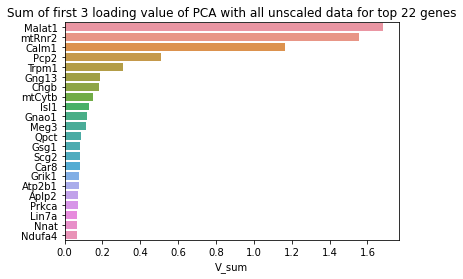

In [12]:
V1_PCA['V_sum'] = V1_PCA.apply(lambda x: (x.abs()).sum(), axis=1)
V1_PCA=V1_PCA.sort_values(by=["V_sum"], ascending= False)
sns.barplot(data=V1_PCA.iloc[:22], x="V_sum", y=V1_PCA.index[:22]).set(title='Sum of first 3 loading value of PCA with all unscaled data for top 22 genes')

##PCA with high expressed genes without scaling

In [13]:
x_high_express = week3_data[week3_data.columns[week3_data.mean() > 2]]

In [14]:
V2=[]
PC2=[]
for i in range(len(x_high_express.columns)):
  PC2.append("PC"+str(i+1))
  V2.append("V"+str(i+1))


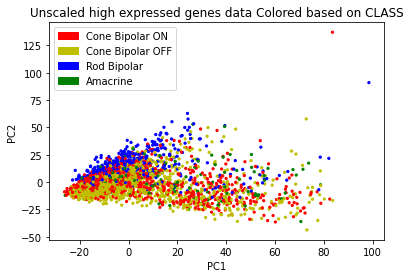

In [15]:
pca_fit_2 = PCA(random_state=42).fit(x_high_express)
pca_loadings_2 = pd.DataFrame(pca_fit_2.components_.T, index=x_high_express.columns, columns=V2)
pca_df_2=pd.DataFrame(pca_fit_2.fit_transform(x_high_express), columns= PC2,index=x_high_express.index)

fig, ax = plt.subplots()
plt.scatter(pca_df_2.PC1, pca_df_2.PC2, c=cell_class_color,s=5)
plt.xlabel('PC1'); plt.ylabel('PC2')
Cone_Bipolar_ON= mpatches.Patch(color='r', label='Cone Bipolar ON')
Cone_Bipolar_OFF= mpatches.Patch(color='y', label='Cone Bipolar OFF')
Rod_Bipolar= mpatches.Patch(color='b', label='Rod Bipolar')
Amacrine= mpatches.Patch(color='g', label='Amacrine')
ax.legend(handles=[Cone_Bipolar_ON,Cone_Bipolar_OFF,Rod_Bipolar,Amacrine])
plt.title("Unscaled high expressed genes data Colored based on CLASS")
plt.show()
score=PCA(random_state=42).fit(x_high_express)

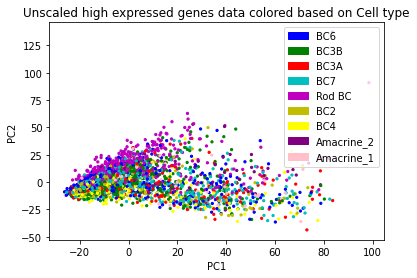

In [16]:
pca_fit_2 = PCA(random_state=42).fit(x_high_express)
pca_loadings_2 = pd.DataFrame(pca_fit_2.components_.T, index=x_high_express.columns, columns=V2)
pca_df_2=pd.DataFrame(pca_fit_2.fit_transform(x_high_express), columns= PC2,index=x_high_express.index)

fig, ax = plt.subplots()

plt.scatter(pca_df_2.PC1, pca_df_2.PC2, c=cell_type_color,s=5)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title("Unscaled high expressed genes data colored based on Cell type")
BC6= mpatches.Patch(color='b', label='BC6')
BC3B = mpatches.Patch(color='g', label='BC3B')
BC3A = mpatches.Patch(color='r', label='BC3A')
BC7 = mpatches.Patch(color='c', label='BC7')
Rod_BC= mpatches.Patch(color='m', label='Rod BC')
BC2 = mpatches.Patch(color='y', label='BC2')
BC4 = mpatches.Patch(color='yellow', label='BC4')
Amacrine_2 = mpatches.Patch(color='purple', label= 'Amacrine_2')
Amacrine_1 = mpatches.Patch(color='pink', label= 'Amacrine_1')
ax.legend(handles=[BC6, BC3B, BC3A, BC7, Rod_BC, BC2, BC4, Amacrine_2,Amacrine_1])

plt.show()
score=PCA(random_state=42).fit(x_high_express)

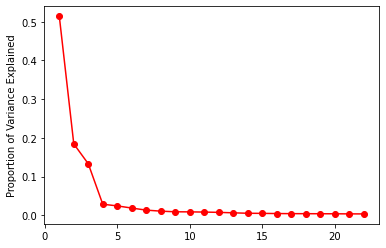

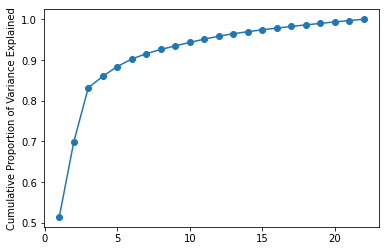

In [17]:
plt.plot(list(range(1,len(pca_df_2.columns)+1)),pca_fit_2.explained_variance_ratio_,'-ro')
plt.ylabel('Proportion of Variance Explained')
plt.show()
plt.plot(list(range(1,len(pca_df_2.columns)+1)),np.cumsum(pca_fit_2.explained_variance_ratio_),'-o')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

In [18]:
pca_loadings_2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
Anp32a,0.006650,0.007948,-0.000939,-0.035360,-0.110796,0.061479,-0.022569,0.118288,0.022234,0.029980,...,-0.151216,0.093180,0.264793,0.059349,0.312312,-0.081384,0.587368,-0.267750,0.070672,0.577648
Aplp2,-0.003760,0.033729,-0.035080,0.136031,-0.180838,0.078376,0.040150,0.017479,0.081110,0.057940,...,-0.115027,0.099833,0.051681,0.609600,0.051626,-0.526558,-0.352933,-0.303162,0.130303,-0.069024
Atp2b1,0.008764,0.032857,-0.032888,-0.080179,-0.282183,-0.104095,0.187457,0.110415,0.071287,0.396361,...,-0.483030,-0.258329,-0.178937,-0.050474,-0.168900,0.130943,-0.030259,0.006652,0.023562,0.030761
Calm1,0.025430,0.345751,-0.811411,0.230706,0.242182,0.000002,0.022477,0.218724,-0.089943,-0.143712,...,-0.057346,-0.004520,0.058451,-0.017979,0.001858,0.019322,-0.011166,0.000895,0.010848,-0.017747
Ckb,0.003765,-0.010707,0.010532,-0.005150,-0.070260,0.119316,-0.068971,0.093327,0.021598,0.050332,...,-0.096850,0.114722,0.069759,-0.031600,-0.054225,-0.141709,0.447706,0.191124,0.603519,-0.556855
Gng13,-0.005496,0.062673,-0.111009,-0.027810,-0.373891,0.077535,-0.305218,-0.134374,-0.090161,-0.282867,...,-0.478891,-0.324288,-0.176981,0.061860,-0.050214,0.076017,0.033901,0.029568,-0.076371,-0.004099
Hnrnpa2b1,0.004484,0.021932,0.004518,-0.014037,-0.022298,0.063838,0.021108,0.078824,0.031923,0.094817,...,-0.095614,0.053976,0.022452,-0.091067,0.190648,-0.269929,0.293113,-0.105772,-0.727738,-0.468560
Luc7l3,0.009803,0.044098,-0.012133,0.001864,-0.029495,0.059701,0.034141,0.000141,0.049636,0.050870,...,-0.072593,-0.118822,-0.154598,-0.345367,0.820350,-0.042438,-0.288762,0.036672,0.208031,-0.064533
Malat1,0.518408,0.767182,0.365134,0.045269,0.037062,-0.038139,-0.039393,-0.022884,-0.023109,0.004604,...,0.011475,-0.006867,0.006137,0.011100,-0.023870,0.007212,0.010332,-0.003274,0.011024,0.000739
Meg3,0.008659,0.036233,0.073418,-0.144564,-0.122627,0.124780,0.568011,0.632354,0.148427,-0.207876,...,0.056339,-0.077125,-0.084475,-0.015179,-0.094875,0.080901,-0.011227,-0.038828,0.002698,-0.001287


[Text(0.5, 1.0, 'loading value of PCA with high expressed unscaled data for top 22 genes')]

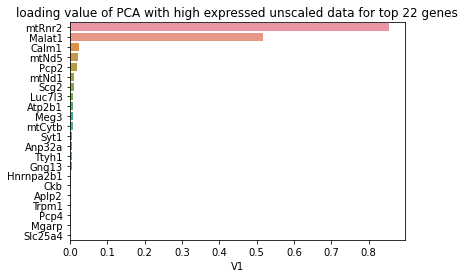

In [19]:
import seaborn as sns 
V1_PCA = pd.DataFrame(data=pca_loadings_2.abs(), index=pca_loadings_2.index, columns = ["V1","V2","V3"])\
       .sort_values(by=["V1"], ascending= False)

# And visualize
sns.barplot(data=V1_PCA, x="V1", y=V1_PCA.index).set(title='loading value of PCA with high expressed unscaled data for top 22 genes')

In [20]:
V1_PCA

,V1,V2,V3
mtRnr2,0.853830,0.482161,0.190076
Malat1,0.518408,0.767182,0.365134
Calm1,0.025430,0.345751,0.811411
mtNd5,0.020895,0.009067,0.023382
Pcp2,0.018802,0.171966,0.319728
mtNd1,0.011910,0.016902,0.029590
Scg2,0.010645,0.021034,0.047444
Luc7l3,0.009803,0.044098,0.012133
Atp2b1,0.008764,0.032857,0.032888
Meg3,0.008659,0.036233,0.073418


In [21]:
V1_PCA['V_sum'] = V1_PCA.apply(lambda x: (x.abs()).sum(), axis=1)

[Text(0.5, 1.0, 'Sum of first 3 loading value of PCA with high expressed unscaled data for top 22 genes')]

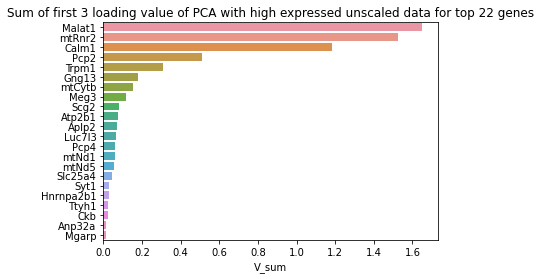

In [22]:
V1_PCA=V1_PCA.sort_values(by=["V_sum"], ascending= False)
sns.barplot(data=V1_PCA, x="V_sum", y=V1_PCA.index).set(title='Sum of first 3 loading value of PCA with high expressed unscaled data for top 22 genes')

##PCA with scaling data

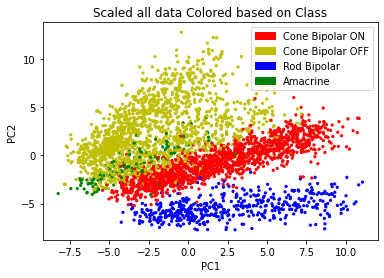

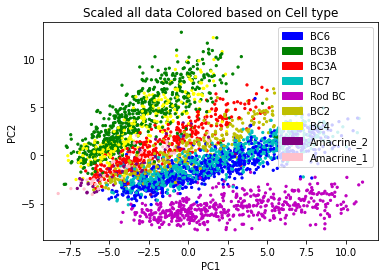

In [23]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(week3_data)
X_scaled = pd.DataFrame(X_scaled,columns = week3_data.columns)
X_scaled.head()
pca = PCA(n_components=X_scaled.shape[1]).fit(X_scaled)
scores = pca.transform(X_scaled)

fig, ax = plt.subplots()
plt.scatter(scores[:,0], scores[:,1], c=cell_class_color, s=5)
Cone_Bipolar_ON= mpatches.Patch(color='r', label='Cone Bipolar ON')
Cone_Bipolar_OFF= mpatches.Patch(color='y', label='Cone Bipolar OFF')
Rod_Bipolar= mpatches.Patch(color='b', label='Rod Bipolar')
Amacrine= mpatches.Patch(color='g', label='Amacrine')
ax.legend(handles=[Cone_Bipolar_ON,Cone_Bipolar_OFF,Rod_Bipolar,Amacrine])
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title("Scaled all data Colored based on Class")
plt.show()

fig, ax = plt.subplots()
plt.scatter(scores[:,0], scores[:,1], c=cell_type_color, s=5)
plt.title("Scaled all data Colored based on Cell type")
BC6= mpatches.Patch(color='b', label='BC6')
BC3B = mpatches.Patch(color='g', label='BC3B')
BC3A = mpatches.Patch(color='r', label='BC3A')
BC7 = mpatches.Patch(color='c', label='BC7')
Rod_BC= mpatches.Patch(color='m', label='Rod BC')
BC2 = mpatches.Patch(color='y', label='BC2')
BC4 = mpatches.Patch(color='yellow', label='BC4')
Amacrine_2 = mpatches.Patch(color='purple', label= 'Amacrine_2')
Amacrine_1 = mpatches.Patch(color='pink', label= 'Amacrine_1')
ax.legend(handles=[BC6, BC3B, BC3A, BC7, Rod_BC, BC2, BC4, Amacrine_2,Amacrine_1])
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

[Text(0.5, 1.0, 'loading value of PCA with all scaled data for top 22 genes')]

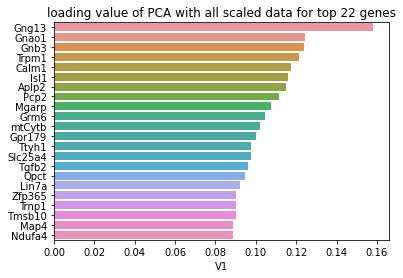

In [24]:
pca_loadings_s = pd.DataFrame(pca.components_.T, index=week3_data.columns, columns=V)
import seaborn as sns 
V1_PCA = pd.DataFrame(data=pca_loadings_s.abs(), index=pca_loadings_s.index, columns = ["V1","V2","V3"])\
       .sort_values(by=["V1"], ascending= False)

# And visualize
sns.barplot(data=V1_PCA.iloc[:22], x="V1", y=V1_PCA.index[:22]).set(title='loading value of PCA with all scaled data for top 22 genes')

[Text(0.5, 1.0, 'Sum of first 3 loading value of PCA with all scaled data for top 22 genes')]

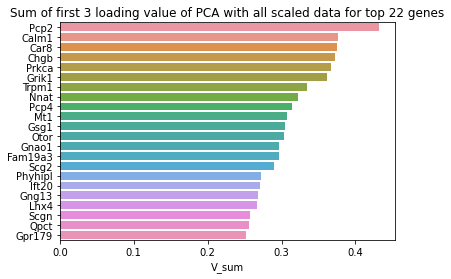

In [25]:
V1_PCA['V_sum'] = V1_PCA.apply(lambda x: (x.abs()).sum(), axis=1)
V1_PCA=V1_PCA.sort_values(by=["V_sum"], ascending= False)
sns.barplot(data=V1_PCA.iloc[:22], x="V_sum", y=V1_PCA.index[:22]).set(title='Sum of first 3 loading value of PCA with all scaled data for top 22 genes')

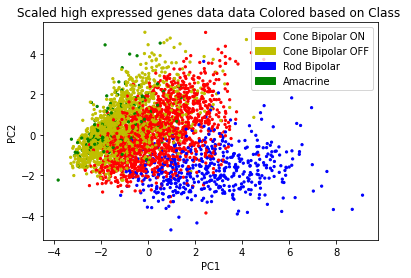

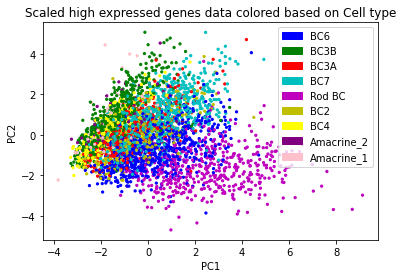

In [26]:
X_scaled_2 = scaler.fit_transform(x_high_express)
X_scaled_2 = pd.DataFrame(X_scaled_2,columns = x_high_express.columns)
X_scaled_2.head()
pca_2 = PCA(n_components=X_scaled_2.shape[1]).fit(X_scaled_2)
scores_2 = pca_2.transform(X_scaled_2)
#class
fig, ax = plt.subplots()
plt.scatter(scores_2[:,0], scores_2[:,1], c=cell_class_color, s=5)
Cone_Bipolar_ON= mpatches.Patch(color='r', label='Cone Bipolar ON')
Cone_Bipolar_OFF= mpatches.Patch(color='y', label='Cone Bipolar OFF')
Rod_Bipolar= mpatches.Patch(color='b', label='Rod Bipolar')
Amacrine= mpatches.Patch(color='g', label='Amacrine')
ax.legend(handles=[Cone_Bipolar_ON,Cone_Bipolar_OFF,Rod_Bipolar,Amacrine])
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title("Scaled high expressed genes data data Colored based on Class ")
plt.show()


#cell type
fig, ax = plt.subplots()
plt.scatter(scores_2[:,0], scores_2[:,1], c=cell_type_color, s=5)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title("Scaled high expressed genes data colored based on Cell type")
BC6= mpatches.Patch(color='b', label='BC6')
BC3B = mpatches.Patch(color='g', label='BC3B')
BC3A = mpatches.Patch(color='r', label='BC3A')
BC7 = mpatches.Patch(color='c', label='BC7')
Rod_BC= mpatches.Patch(color='m', label='Rod BC')
BC2 = mpatches.Patch(color='y', label='BC2')
BC4 = mpatches.Patch(color='yellow', label='BC4')
Amacrine_2 = mpatches.Patch(color='purple', label= 'Amacrine_2')
Amacrine_1 = mpatches.Patch(color='pink', label= 'Amacrine_1')
ax.legend(handles=[BC6, BC3B, BC3A, BC7, Rod_BC, BC2, BC4, Amacrine_2,Amacrine_1])

plt.show()


[Text(0.5, 1.0, 'loading value of PCA with high expressed scaled data for top 22 genes')]

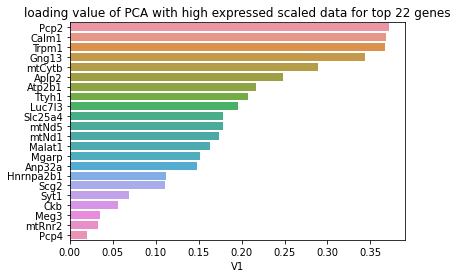

In [27]:

pca_loadings_2s = pd.DataFrame(pca_2.components_.T, index=x_high_express.columns, columns=V2)
import seaborn as sns 
V1_PCA = pd.DataFrame(data=pca_loadings_2s.abs(), index=pca_loadings_2s.index, columns = ["V1","V2","V3"])\
       .sort_values(by=["V1"], ascending= False)

# And visualize
sns.barplot(data=V1_PCA, x="V1", y=V1_PCA.index).set(title='loading value of PCA with high expressed scaled data for top 22 genes')

[Text(0.5, 1.0, 'Sum of first 3 loading value of PCA with high expressed scaled data for top 22 genes')]

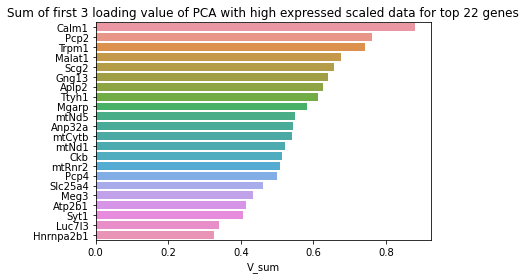

In [28]:
V1_PCA['V_sum'] = V1_PCA.apply(lambda x: (x.abs()).sum(), axis=1)
V1_PCA=V1_PCA.sort_values(by=["V_sum"], ascending= False)
sns.barplot(data=V1_PCA, x="V_sum", y=V1_PCA.index).set(title='Sum of first 3 loading value of PCA with high expressed scaled data for top 22 genes')

#Clustering

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from scipy.cluster.hierarchy import fcluster, cut_tree, linkage, dendrogram
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm, Normalize

In [30]:
dataweek1=data.drop(data.columns[-2],axis=1)
X = dataweek1.drop('CLASS', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled.head()
class_label =dataweek1["CLASS"].map({'Cone Bipolar ON' :0, 'Cone Bipolar OFF' :1, 'Rod Bipolar' :2, 'Amacrine' :3}).astype(int)
cell_type=data["CELLTYPE"].map({'BC6':1, 'BC3B':2, 'BC3A':3, 'BC7':4, 'Rod BC':5, 'BC2':6, 'BC4':7, 'Amacrine_2':8,'Amacrine_1':9}).astype(int)
labels_class = ['Cone Bipolar ON', 'Cone Bipolar OFF', 'Rod Bipolar', 'Amacrine']

In [31]:
pca = PCA(n_components=X_scaled.shape[1]).fit(X_scaled)
scores = pca.transform(X_scaled)

## K-Means clustering with scaled data

Text(0.5, 0.98, 'Kmeans clusters on PCA 2 Dimension')

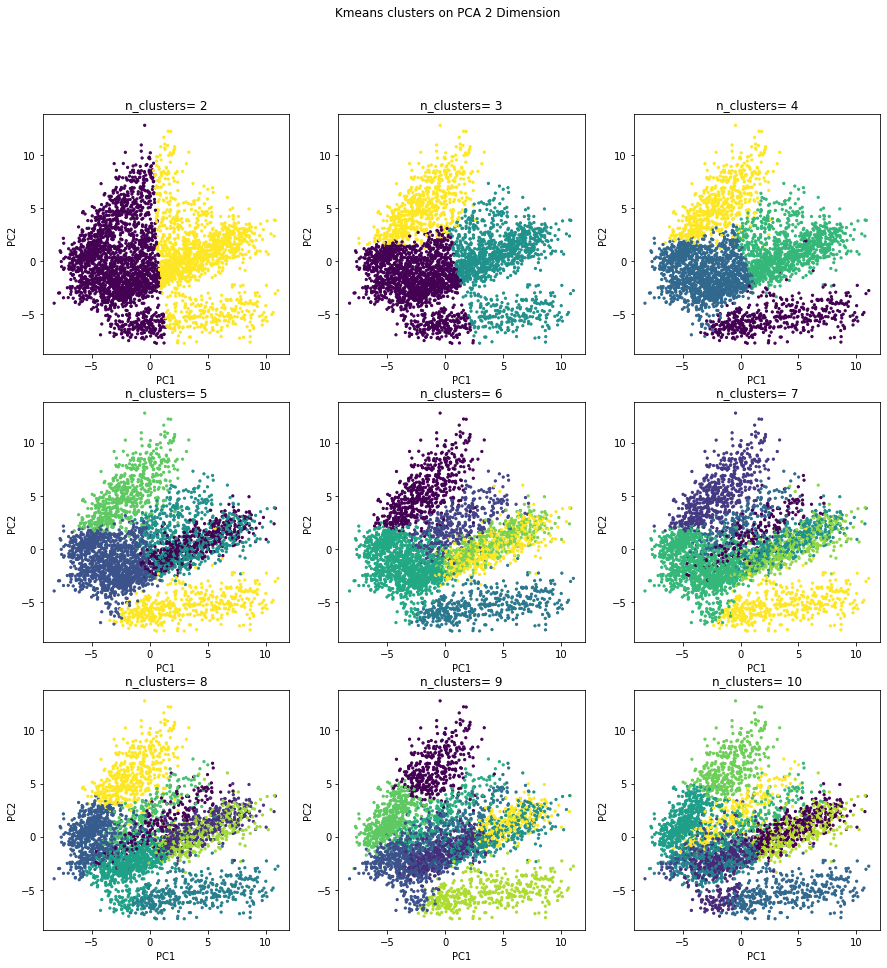

In [32]:
k = range(2, 12, 1)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
j = [[0,0], [0,1], [0,2], \
     [1,0], [1,1], [1,2], \
     [2,0], [2,1], [2,2]]
for i, j in zip(k,j):
  #print(j[0], j[1], i)
  
  cls = KMeans(n_clusters=i, n_init=20,random_state=0)
  cls.fit(X_scaled)
  clusters_kmeans = cls.predict(X_scaled)
  centers = cls.cluster_centers_
  
  axes[j[0],j[1]].scatter(scores[:, 0], scores[:, 1], c=clusters_kmeans, s=5)
  axes[j[0],j[1]].set_title(f'n_clusters= {i}')
  axes[j[0],j[1]].set_xlabel('PC1')
  axes[j[0],j[1]].set_ylabel('PC2')
fig.suptitle('Kmeans clusters on PCA 2 Dimension')

In [33]:
clusters_kmeans.shape

(3724,)

In [34]:
cls = KMeans(n_clusters=4, n_init=20,random_state=0)
cls.fit(X_scaled)
clusters_kmeans = cls.predict(X_scaled)

In [35]:
conf_kmeans = confusion_matrix(class_label, clusters_kmeans)
print(conf_kmeans)

[[  6 594 837   0]
 [  4 788 244 622]
 [475  25   0   0]
 [  0 120   7   2]]


In [36]:
accuracy_score(class_label, clusters_kmeans)

0.21374865735767992

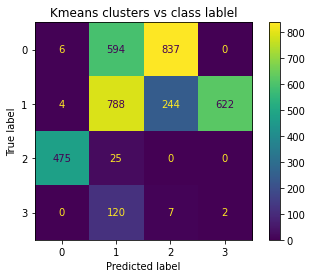

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_kmeans)
disp.plot()
plt.title("Kmeans clusters vs class lablel")
plt.show()

##  Hierarchical Clustering with scaled data

Text(0.5, 0.98, 'Hierarchical clusters on PCA 2 Dimension')

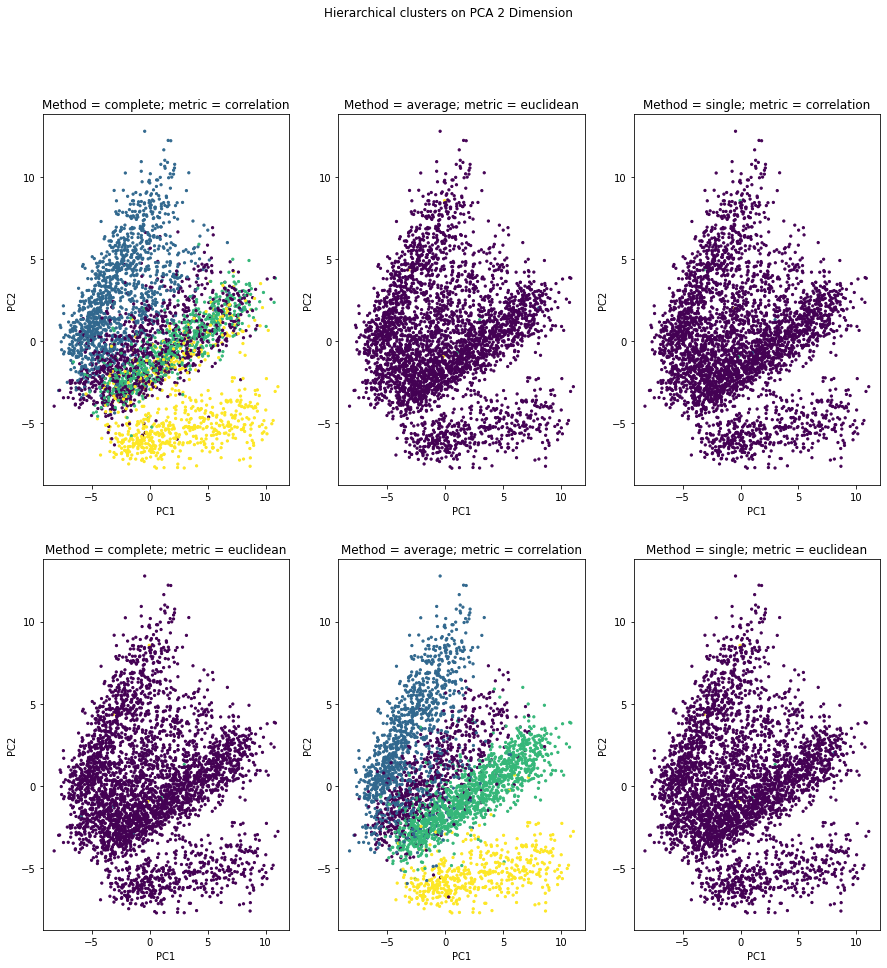

In [38]:
#k = range(2, 12, 1)
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axis = [[0,0], [0,1], [0,2], \
     [1,0], [1,1], [1,2]]
methods = ['complete', 'average', 'single']*2
metric = ['correlation', 'euclidean']*3
for metd, metr, j in zip(methods,metric, axis):
  #print(j[0], j[1], i)
  
  hc = linkage(X_scaled, method=metd, metric=metr)
  hc_clusters = cut_tree(hc, 4).ravel()
  
  axes[j[0],j[1]].scatter(scores[:, 0], scores[:, 1], c=hc_clusters, s=5)
  axes[j[0],j[1]].set_title(f'Method = {metd}; metric = {metr}')
  axes[j[0],j[1]].set_xlabel('PC1')
  axes[j[0],j[1]].set_ylabel('PC2')
fig.suptitle('Hierarchical clusters on PCA 2 Dimension')

[[  60   63 1302   12]
 [ 653  969   33    3]
 [   5    4    5  486]
 [   4  120    5    0]]


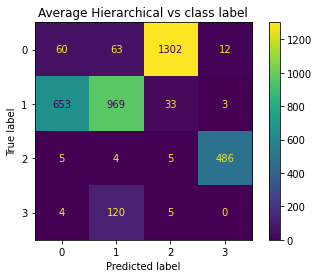

In [39]:
# compare the class label vs hc_avg cluster label
hc_avg = linkage(X_scaled, method='average', metric='correlation')
hc_clusters = cut_tree(hc_avg, 4).ravel()
com = confusion_matrix(class_label, hc_clusters)
print(com)
disp = ConfusionMatrixDisplay(confusion_matrix=com)
disp.plot()
plt.title("Average Hierarchical vs class label")
plt.show()

## K-Means clustering with unscaled data

In [ ]:
k = range(2, 12, 1)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
j = [[0,0], [0,1], [0,2], \
     [1,0], [1,1], [1,2], \
     [2,0], [2,1], [2,2]]
for i, j in zip(k,j):
  #print(j[0], j[1], i)
  
  cls = KMeans(n_clusters=i, n_init=20,random_state=0)
  cls.fit(week3_data)
  clusters_kmeans = cls.predict(week3_data)
  centers = cls.cluster_centers_
  
  axes[j[0],j[1]].scatter(pca_df.PC1, pca_df.PC2, c=clusters_kmeans, s=5)
  axes[j[0],j[1]].set_title(f'n_clusters= {i}')
  axes[j[0],j[1]].set_xlabel('PC1')
  axes[j[0],j[1]].set_ylabel('PC2')
fig.suptitle('Kmeans clusters on PCA 2 Dimension with unscaled data')

In [ ]:
clusters_kmeans.shape

In [ ]:
cls = KMeans(n_clusters=4, n_init=20,random_state=0)
cls.fit(week3_data)
clusters_kmeans = cls.predict(week3_data)

In [ ]:
conf_kmeans = confusion_matrix(class_label, clusters_kmeans)
print(conf_kmeans)

In [ ]:
#accuracy_score(class_label, clusters_kmeans)
#make nosense because the lable is not related to the clusters

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_kmeans)
disp.plot()
plt.title("unscaling data Kmeans clustering label vs class")
plt.show()

##  Hierarchical Clustering with unscaled data

In [ ]:
#k = range(2, 12, 1)
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axis = [[0,0], [0,1], [0,2], \
     [1,0], [1,1], [1,2]]
methods = ['complete', 'average', 'single']*2
metric = ['correlation', 'euclidean']*3
for metd, metr, j in zip(methods,metric, axis):
  #print(j[0], j[1], i)
  
  hc = linkage(week3_data, method=metd, metric=metr)
  hc_clusters = cut_tree(hc, 4).ravel()
  
  axes[j[0],j[1]].scatter(pca_df.PC1, pca_df.PC2, c=hc_clusters, s=5)
  axes[j[0],j[1]].set_title(f'Method = {metd}; metric = {metr}')
  axes[j[0],j[1]].set_xlabel('PC1')
  axes[j[0],j[1]].set_ylabel('PC2')
fig.suptitle('Hierarchical clusters on PCA 2 Dimension with unscaled data')

In [ ]:
# compare the class label vs hc_avg cluster label
hc_avg = linkage(week3_data, method='average', metric='correlation')
hc_clusters = cut_tree(hc_avg, 4).ravel()
com = confusion_matrix(class_label, hc_clusters)
print(com)
disp = ConfusionMatrixDisplay(confusion_matrix=com)
disp.plot()
plt.title("Hierarchical Clustering with unscaled data for 4 clusters compare with the classes")
plt.show()

#advanced analysis

##KNN with pca pre-process data(all gene)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
x=pca_df.values
y=cell_class.values
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.25)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

In [ ]:
data['CLASS'].value_counts(ascending=True)

In [ ]:
ypred_test=knn.predict(X_test)
conf_m = confusion_matrix(y_test, ypred_test, labels=knn.classes_)
conf_pd = pd.DataFrame(conf_m,index=knn.classes_, columns=knn.classes_)
conf_pd.index.name = 'True'
conf_pd.columns.name = 'Predicted'
print(conf_pd)

fig, ax = plt.subplots(figsize=(12, 12))
conf_m_display = ConfusionMatrixDisplay(conf_m,display_labels=['Cone Bipolar ON', 'Cone Bipolar OFF', 'Rod Bipolar', 'Amacrine']).plot(ax=ax)
plt.title("KNN result with PCA(all data without scaling) ")
plt.show()
print("accuracy: {}".format(accuracy_score(y_test, ypred_test)))

##KNN with pca pre-process data(high express gene)

In [ ]:
x=pca_df_2.values
y=cell_class.values
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.25)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

In [ ]:
ypred_test=knn.predict(X_test)
conf_m = confusion_matrix(y_test, ypred_test, labels=knn.classes_)
conf_pd = pd.DataFrame(conf_m,index=knn.classes_, columns=knn.classes_)
conf_pd.index.name = 'True'
conf_pd.columns.name = 'Predicted'
print(conf_pd)

fig, ax = plt.subplots(figsize=(12, 12))
conf_m_display = ConfusionMatrixDisplay(conf_m,display_labels=['Cone Bipolar ON', 'Cone Bipolar OFF', 'Rod Bipolar', 'Amacrine']).plot(ax=ax)
plt.title("KNN result with PCA(high expressed genes data without scaling) ")
plt.show()
print("accuracy: {}".format(accuracy_score(y_test, ypred_test)))